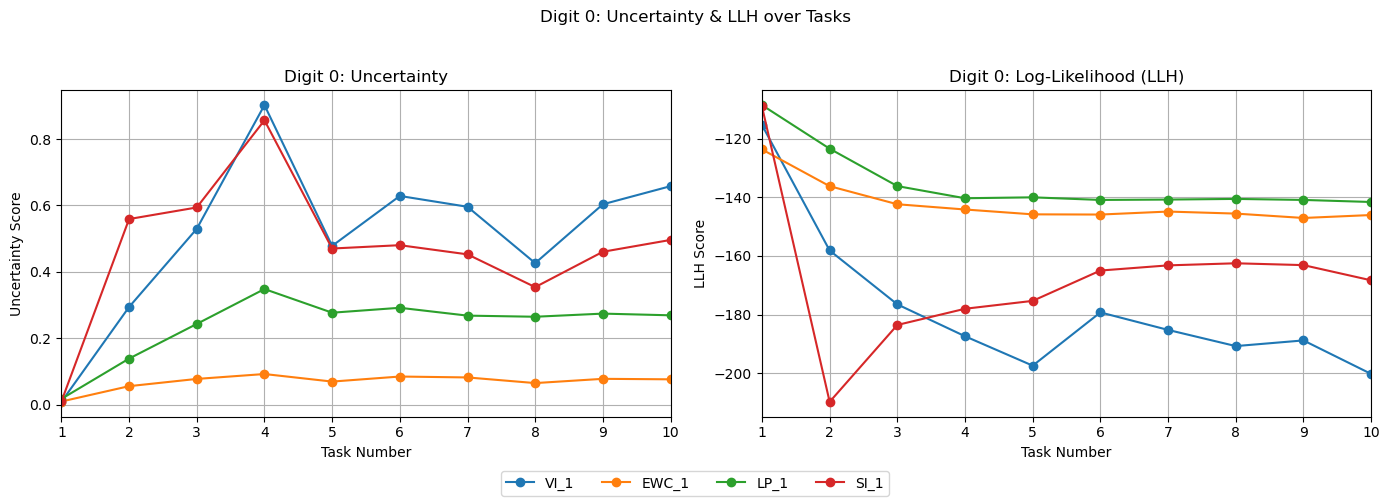

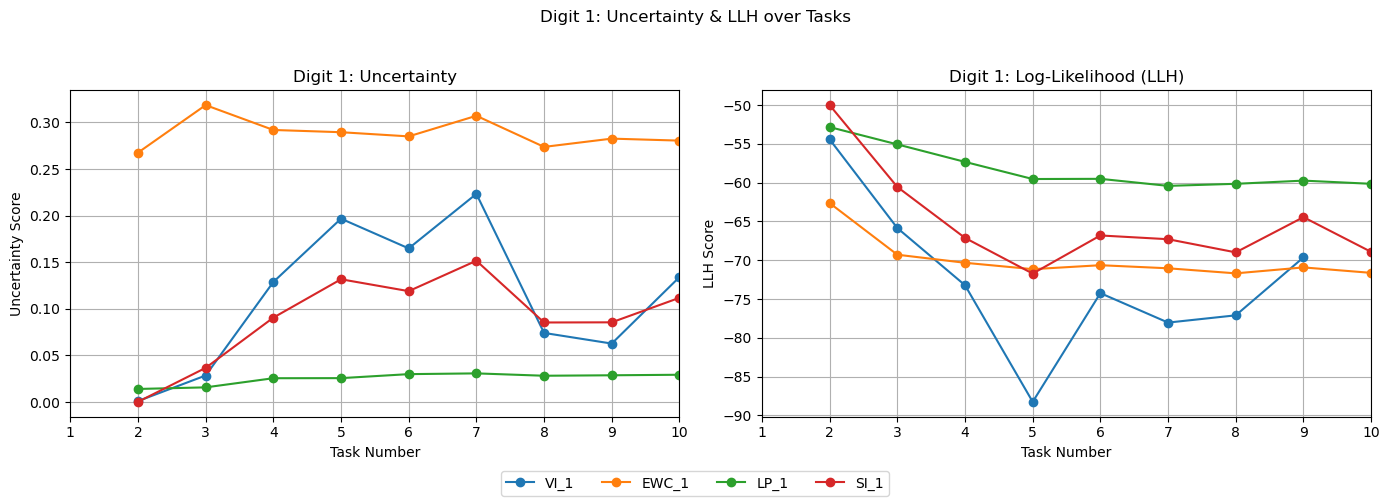

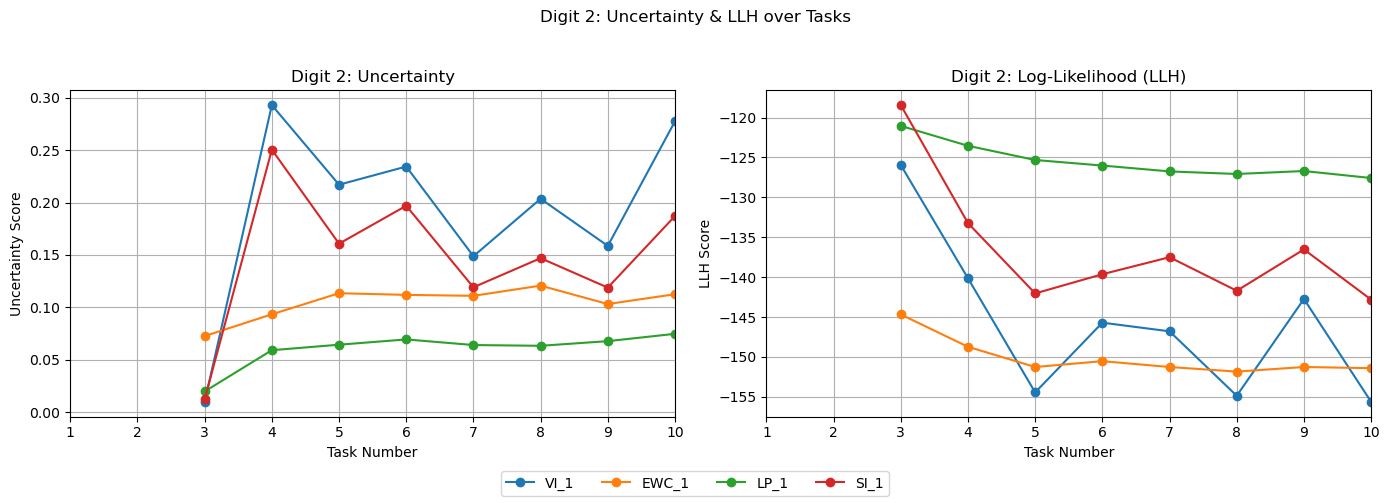

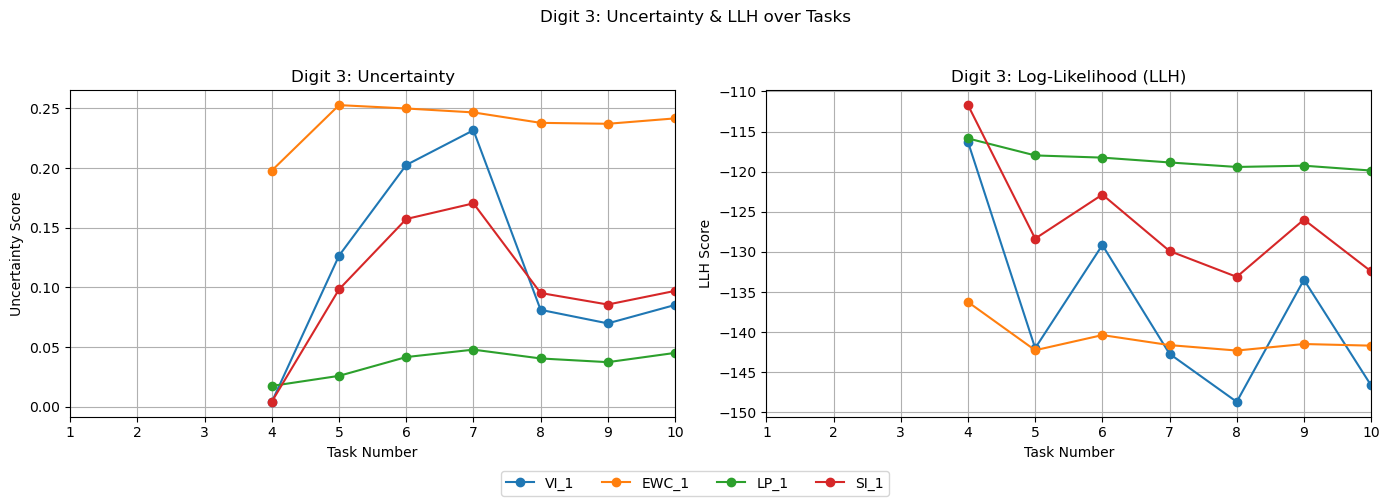

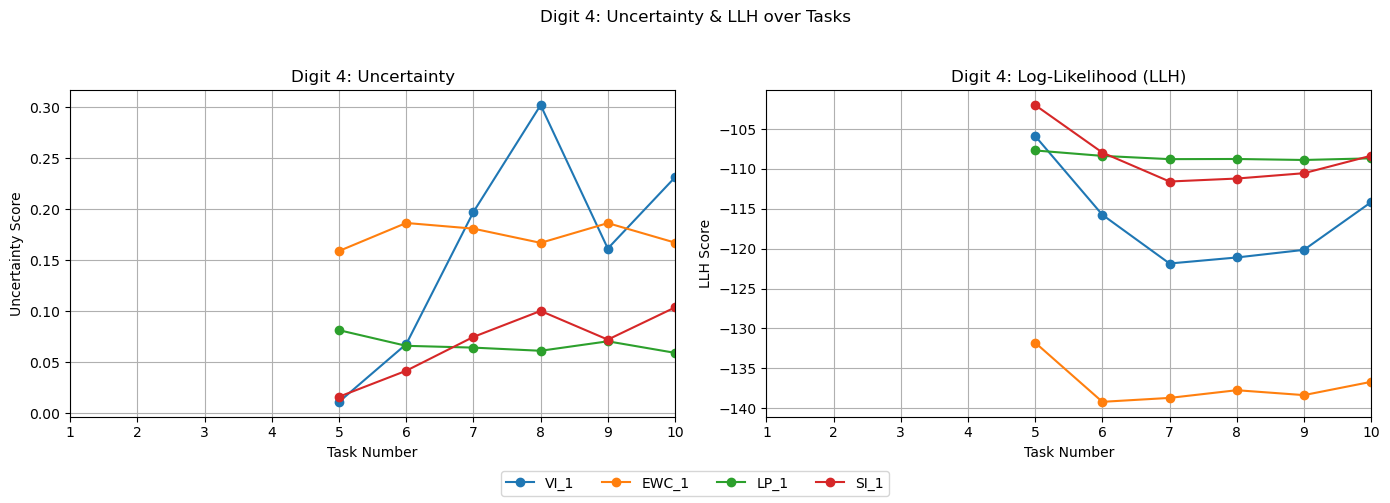

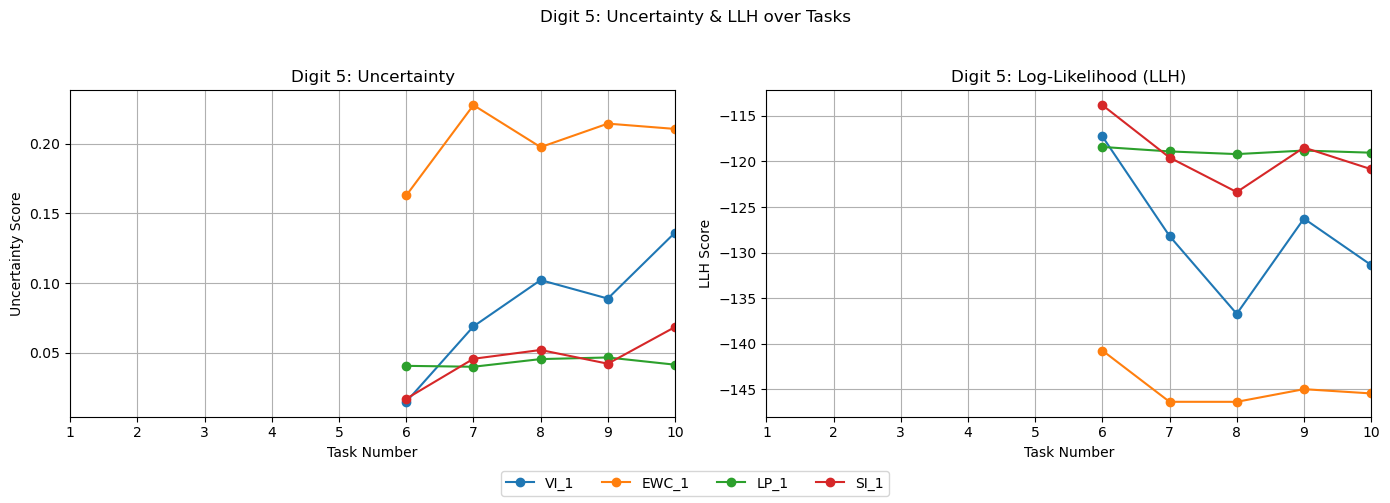

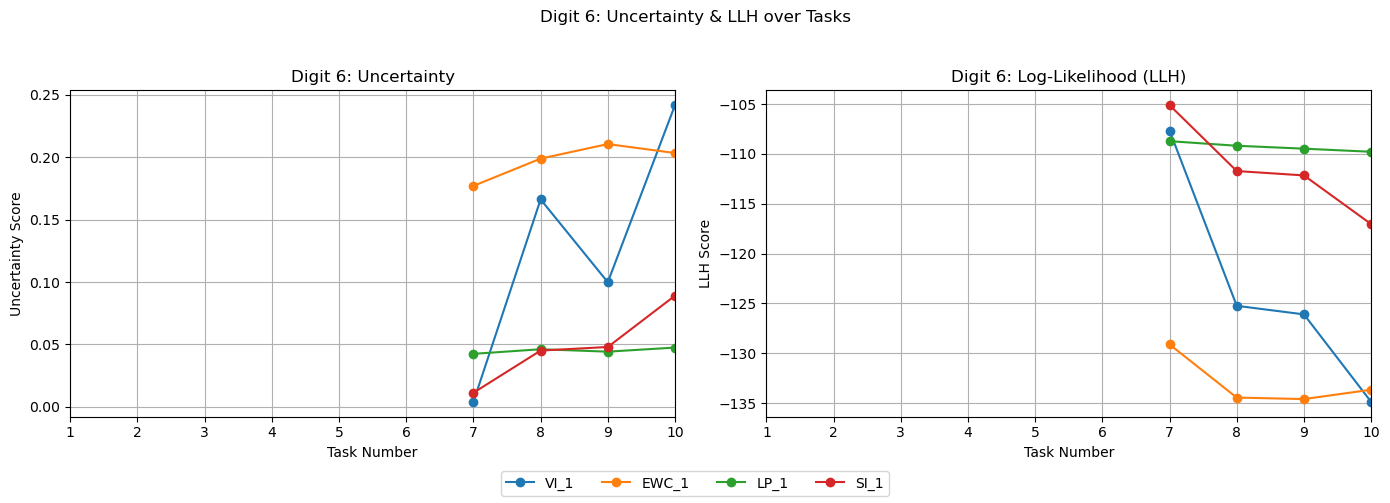

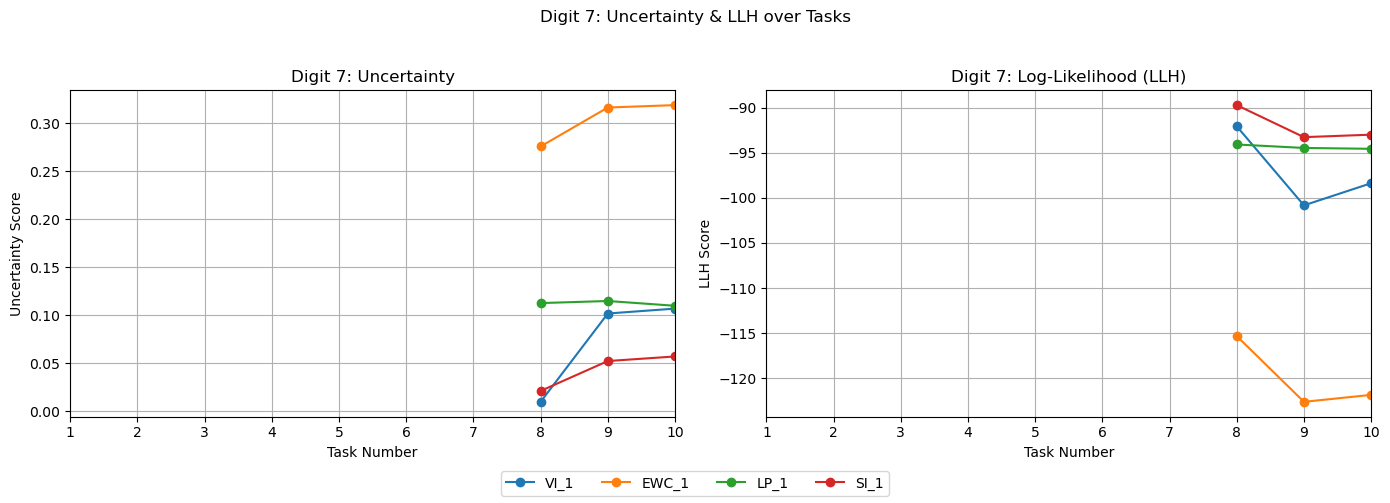

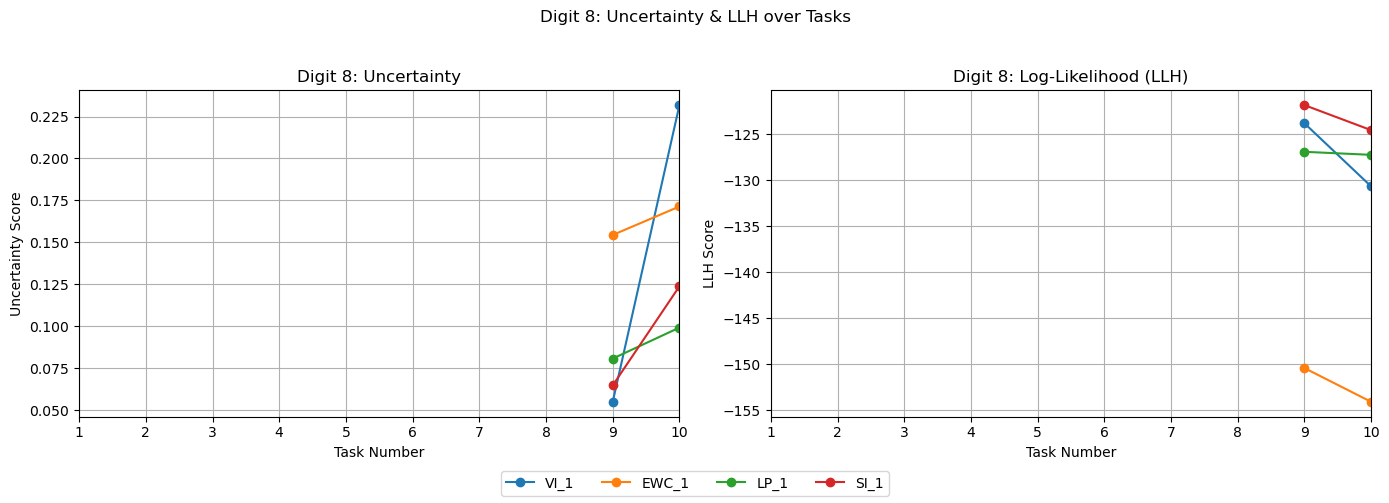

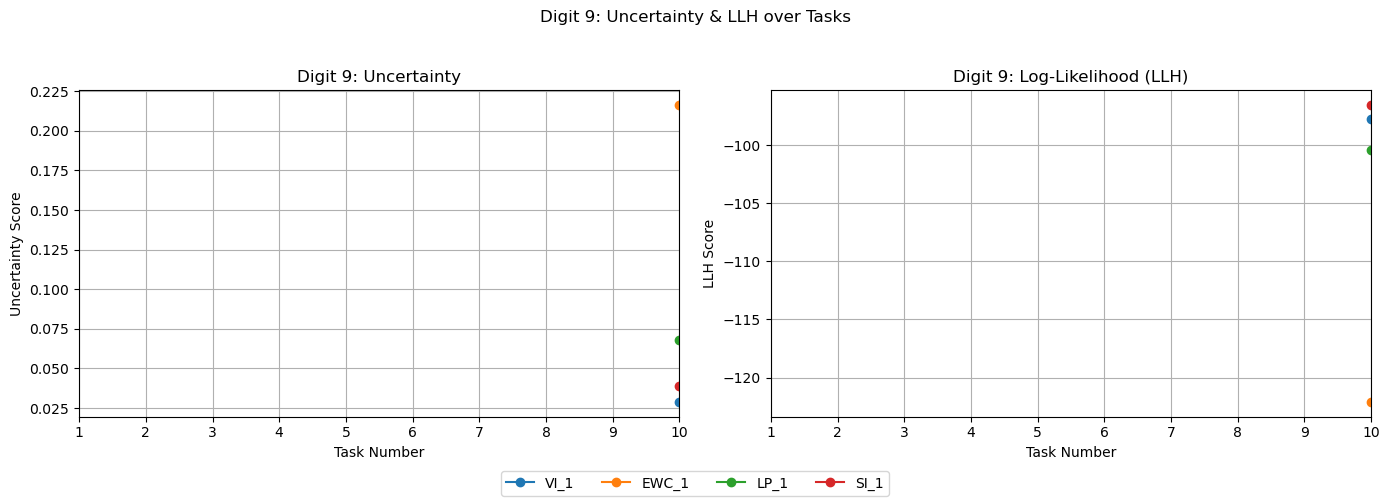

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -----------------------------
# Step 1: Define algorithms and file paths
# -----------------------------
algorithms = ['VI_1', 'EWC_1', "LP_1", "SI_1"]
file_template = '200epochs_gen/{}.json'

# -----------------------------
# Step 2: Load JSON results for each algorithm
# -----------------------------
results_by_alg = {}
for alg in algorithms:
    with open(file_template.format(alg), 'r') as f:
        data = json.load(f)
        results_by_alg[alg] = data['results']

# -----------------------------
# Step 3: Plot Uncertainty and LLH for each digit
# -----------------------------
all_digits = sorted({int(d) for alg in results_by_alg for d in results_by_alg[alg].keys()})
task_range = list(range(1, 11))  # Tasks 1 to 10

for digit in all_digits:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
    
    for alg in algorithms:
        # --- Prepare Uncertainty ---
        unc_scores = [np.nan] * 10
        llh_scores = [np.nan] * 10
        if str(digit) in results_by_alg[alg]:
            metrics = results_by_alg[alg][str(digit)]
            start_task = digit + 1
            for i, val in enumerate(metrics["uncertainty"]):
                task_idx = start_task + i
                if 1 <= task_idx <= 10:
                    unc_scores[task_idx - 1] = val
            for i, val in enumerate(metrics["llhs"]):
                task_idx = start_task + i
                if 1 <= task_idx <= 10:
                    llh_scores[task_idx - 1] = val

        axs[0].plot(task_range, unc_scores, marker='o', label=alg)
        axs[1].plot(task_range, llh_scores, marker='o', label=alg)

    # --- Uncertainty Plot ---
    axs[0].set_title(f"Digit {digit}: Uncertainty")
    axs[0].set_xlabel("Task Number")
    axs[0].set_ylabel("Uncertainty Score")
    axs[0].set_xlim(1, 10)
    axs[0].set_xticks(task_range)
    axs[0].grid(True)
    
    # --- LLH Plot ---
    axs[1].set_title(f"Digit {digit}: Log-Likelihood (LLH)")
    axs[1].set_xlabel("Task Number")
    axs[1].set_ylabel("LLH Score")
    axs[1].set_xlim(1, 10)
    axs[1].set_xticks(task_range)
    axs[1].grid(True)
    
    # --- Shared Legend ---
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=len(algorithms))
    plt.suptitle(f"Digit {digit}: Uncertainty & LLH over Tasks")
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()